<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/john210808/covasim_delta/blob/main/demo/week3/FitParameters.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# parameters

In [ ]:
pip install covasim

In [1]:
import pandas as pd
from datetime import datetime
import covasim as cv

pd.read_csv("https://raw.githubusercontent.com/M3IT/COVID-19_Data/master/Data/COVID_AU_state.csv").to_csv("COVID_AU_state.csv")

def processDate(start_date):
    df = pd.read_csv("COVID_AU_state.csv")
    df['date'] = pd.to_datetime(df['date'])  
    mask = (df.date >= pd.to_datetime(start_date)) & (df.state_abbrev == 'NSW')
    df = df.loc[mask]
    initCase = df['confirmed_cum'].values[0]
    df = df[['date', 'confirmed', 'tests', 'deaths']]
    df.columns = ['date', 'new_diagnoses', 'new_tests', 'new_deaths']
    df.to_csv("nsw.csv", index=False)
    return initCase

Covasim 3.0.7 (2021-06-29) — © 2021 by IDM


# Age distribution

In [2]:
# refer to: http://www.healthstats.nsw.gov.au/indicator/dem_pop_age
nsw = {
   '0-9':  1057247,
  '10-19': 965844,
  '20-29': 1057444,
  '30-39': 1179944,
  '40-49': 1061300,
  '50-59': 999078,
  '60-69': 877865,
  '70-79': 617866,
  '80+':   369288
}

cv.data.country_age_data.data['NSW'] = nsw

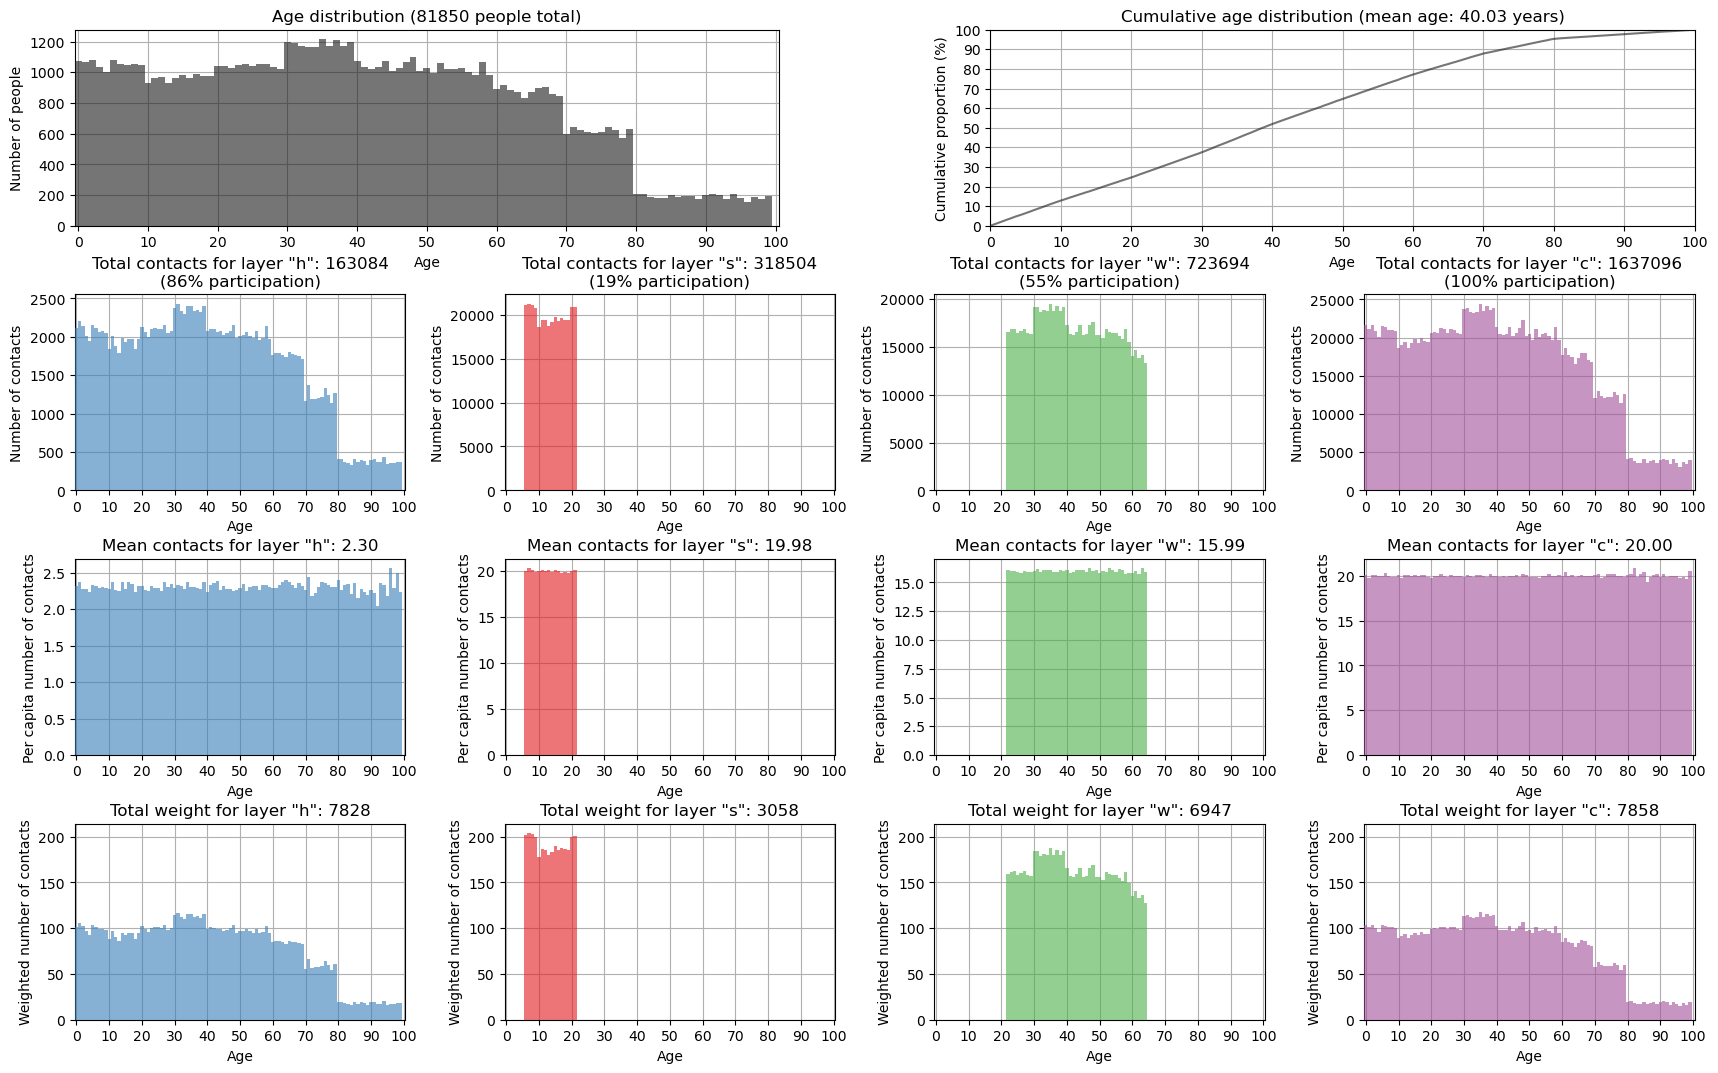

In [4]:
import covasim as cv
cv.options.set(dpi=100, show=False, close=True, verbose=0) # Standard options for Jupyter notebook

pars = dict(    
    location = 'NSW', 
    pop_type  = 'hybrid',
    pop_size  = 81.85e3, # 8.185M people
    pop_scale = 100,
#     pop_infected = init * 0.01, 
#     rescale   = True,
#     rescale_threshold = 0.05,
#     rescale_factor = 2,
#     start_day = start_date,
#     end_day   = end_date,
#     beta      = 0.023,
)

sim = cv.Sim(pars)
sim.initialize() # Create people
fig = sim.people.plot() # Show statistics of the people